# Analytics usando tipos de dados complexos
<p><img src = https://thumbs.dreamstime.com/b/cores-em-ascens%C3%A3o-superf%C3%ADcie-tridimensional-colorida-de-indiv%C3%ADduos-com-dados-complexos-arco-%C3%ADris-como-malha-arame-preto-ou-241163870.jpg width=500></p>

## Introdução
No módulo anterior, vimos como podemos importar e exportar dados para outras ferramentas analíticas para aproveitar as ferramentas analíticas fora do nosso banco de dados. Muitas vezes é mais fácil analisar números, mas no mundo real, os dados são frequentemente encontrados em outros formatos: palavras, locais, datas e, às vezes, estruturas de dados complexas. Neste módulo, veremos esses outros formatos e veremos como podemos usar esses dados na nossa análise.

Primeiro, veremos dois tipos de coluna comumente encontrados: colunas de data e hora (**datetime**) e colunas de **latitude** e **longitude**. Esses tipos de dados nos darão uma compreensão fundamental de como entender nossos dados de uma perspectiva temporal e geoespacial. Em seguida, veremos tipos de dados complexos, como **arrays** e **JSON**, e aprenderemos como extrair pontos de dados desses tipos de dados complexos. Essas estruturas de dados são frequentemente usadas para dados alternativos ou dados em nível de log, como logs de sites. Por fim, veremos como podemos extrair significado do texto em nosso banco de dados e usar dados de texto para extrair **insights**.
Ao final do módulo, você terá ampliado seus recursos de análise para que possa aproveitar praticamente qualquer tipo de dado disponível para você.
## Tipos de dados de data e hora para análise
Estamos todos familiarizados com datas e horários, mas não pensamos frequentemente em como essas medidas quantitativas são representadas. Sim, eles são representados por números, mas não por um único número. Em vez disso, eles são medidos com um conjunto de números, um para o ano, um para o mês, um para o dia do mês, um para a hora, um para o minuto e assim por diante.

O que podemos não perceber, porém, é que esta é uma representação complexa, composta por vários componentes diferentes. Por exemplo, saber o minuto atual sem saber a hora atual é inútil. Além disso, existem maneiras complexas de interagir com datas e horas, por exemplo, diferentes pontos no tempo podem ser subtraídos um do outro. Além disso, a hora atual pode ser representada de forma diferente dependendo de onde você está no mundo.

Como resultado desses meandros, precisamos ter um cuidado especial ao trabalhar com esse tipo de dados. Na verdade, o *Postgres*, como a maioria dos bancos de dados, oferece tipos de dados especiais que podem representar esses tipos de valores. Começaremos examinando o tipo de data (**date**).

### Começando com o tipo de data
As datas podem ser facilmente representadas usando strings, por exemplo, "1 de janeiro de 2000", que representa claramente uma data específica, mas as datas são uma forma especial de texto, pois representam um valor quantitativo e sequencial. Você pode adicionar uma semana à data atual, por exemplo. Uma determinada data tem muitas propriedades diferentes que você pode querer usar em sua análise, por exemplo, o ano ou o dia da semana que a data representa. Trabalhar com datas também é necessário para a análise de séries temporais, que é um dos tipos mais comuns de análise que surgem.

O padrão SQL inclui um tipo de dados **DATE** e o *PostgreSQL* oferece ótimas funcionalidades para interagir com esse tipo de dados. Primeiro, podemos configurar nosso banco de dados para exibir datas no formato com o qual estamos mais familiarizados. O PostgreSQL usa o parâmetro **DateStyle** para definir essas configurações. Para ver suas configurações atuais, você pode usar o seguinte comando:

`SHOW DateStyle;`

A seguir está a saída da consulta anterior:

In [1]:
# Importando o SqlAlchemy
import pandas as pd
from sqlalchemy import create_engine

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
               "@{host}:{port}/{database}")

# Instanciando a Função create_engine com a string de conexão
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="admin",
    host="127.0.0.1",
    port=5432,
    database="sqlda"))

# Criando a Consulta ou o comando SQL a ser executado
sql = """
		SHOW DateStyle
      """
# Conectando a Engine
conn = engine.connect()

# Executando o Comando SQL
rs = conn.execute(sql)

for row in rs:
    print(row)

('ISO, DMY',)


O primeiro parâmetro especifica o formato de saída da **International Organization Standardization (ISO)**, que exibe a data como Ano, Mês, Dia e o segundo parâmetro especifica a ordem (por exemplo, Mês, Dia, Ano versus Dia, Mês, Ano) para entrada ou resultado. Você pode configurar a saída para seu banco de dados usando o seguinte comando:

`SET DateStyle='ISO, MDY';`



In [87]:
sql = """
	  SET DateStyle='ISO, MDY';
      """
# Executando o Comando SQL
conn.execute(sql)

# Criando a Consulta ou o comando SQL a ser executado
sql1 = """
		SHOW DateStyle
      """

# Executando o Comando SQL
rs = conn.execute(sql1)

for row in rs:
    print(row)

('ISO, MDY',)


Por exemplo, se você quiser defini-lo para o formato europeu de Dia, Mês, Ano, defina DateStyle como 'GERMAN, DMY'. Para este módulo, usaremos o formato de exibição ISO (Ano, Mês, Dia) e o formato de entrada Mês, Dia, Ano. Você pode configurar esse formato usando o comando anterior.

In [82]:
sql = """
	  SET DateStyle='GERMAN, DMY';
      """
# Executando o Comando SQL
conn.execute(sql)

# Criando a Consulta ou o comando SQL a ser executado
sql1 = """
		SHOW DateStyle
      """

# Executando o Comando SQL
rs = conn.execute(sql1)

for row in rs:
    print(row)

('German, DMY',)


Vamos verificar se funcionou com uma consulta no SQL:

In [88]:
sql = """
       SELECT '1/8/1999'::DATE;
	  """
rs = conn.execute(sql)
for row in rs:
    print(row)

(datetime.date(1999, 1, 8),)


Como podemos ver, quando inserimos uma string, '1/8/1999', usando o formato **Mês, Dia, Ano,** o *Postgres* entende que é 8 de janeiro de 1999 (e não 1º de agosto de 1999). Exibe a data usando o formato ISO especificado anteriormente, no formato AAAA-MM-DD.

Da mesma forma, podemos usar os seguintes formatos com traços e pontos para separar os componentes de data:

In [89]:
sql = """
      SELECT '1-8-1999'::DATE;
	  """
rs = conn.execute(sql)
for row in rs:
    print(row)

(datetime.date(1999, 1, 8),)


In [90]:
sql = """
      SELECT '1.8.1999'::DATE;
	  """
rs = conn.execute(sql)
for row in rs:
    print(row)

(datetime.date(1999, 1, 8),)


Além de exibir datas que são inseridas como strings, podemos exibir a data atual de maneira muito simples usando as palavras-chave **current_date** no Postgres:

In [91]:
sql = """
      SELECT current_date;
	  """
rs = conn.execute(sql)
for row in rs:
    print(row)

(datetime.date(2022, 7, 11),)


Além do tipo de dados **DATE**, o padrão SQL oferece um tipo de dado **TIMESTAMP**. Um carimbo de data/hora representa uma data e uma hora, até um microssegundo.

Podemos ver o timestamp atual usando a função **now()** e podemos especificar o nosso fuso horário usando **AT TIME ZONE 'UTC'**. Aqui está um exemplo da função **now()** com o fuso horário Eastern Standard especificado:

In [93]:
sql = """
      SELECT now() AT TIME ZONE 'EST';
	  """
rs = conn.execute(sql)
for row in rs:
    print(row)

(datetime.datetime(2022, 7, 11, 19, 43, 15, 464824),)


Também podemos usar o tipo de dados timestamp sem o fuso horário especificado. Você pode pegar o fuso horário atual com a função **now()**:

In [94]:
sql = """
      SELECT now();
	  """
rs = conn.execute(sql)
for row in rs:
    print(row)

(datetime.datetime(2022, 7, 11, 20, 43, 15, 464824, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000))),)


> #### Observação
> Em geral, é recomendável usar um carimbo de data/hora com o fuso horário especificado. Se você não especificar o fuso horário, o valor do carimbo de data/hora pode ser questionável (por exemplo, o horário pode ser representado no fuso horário em que a empresa está localizada, no horário Universal Time Coordinated (UTC) ou no fuso horário do cliente ).

Os tipos de dados date e timestamp são úteis não apenas porque exibem datas em um formato legível, mas também porque armazenam esses valores usando menos bytes do que a representação de string equivalente (um valor de tipo de data requer apenas 4 bytes, enquanto a representação de texto equivalente pode ser 8 bytes para uma representação de 8 caracteres, como **'20160101'**). Além disso, o *Postgres* fornece funcionalidades especiais para manipular e transformar datas, e isso é particularmente útil para análise de dados.

### Transformando Tipos de Data
Muitas vezes, queremos decompor nossas datas em suas partes componentes. Por exemplo, podemos estar interessados apenas no ano e no mês, mas não no dia, para a análise mensal de nossos dados. Para fazer isso, podemos usar **EXTRACT(component FROM data)**. Aqui está um exemplo:

In [2]:
import pandas as pd

sql = """
      SELECT current_date,
        EXTRACT(year FROM current_date) AS year,
        EXTRACT(month FROM current_date) AS month,
        EXTRACT(day FROM current_date) AS day;
	  """
pd.read_sql_query(con=conn, sql=sql)

,current_date,year,month,day
0,2022-07-16,2022.0,7.0,16.0


Da mesma forma, podemos abreviar esses componentes como **y**, **mon** e **d**, e o *Postgres* entenderá o que queremos:

In [99]:
sql = """
      SELECT current_date,
            EXTRACT(y FROM current_date) AS year,
            EXTRACT(mon FROM current_date) AS month,
            EXTRACT(d FROM current_date) AS day;
	  """
pd.read_sql_query(con=conn, sql=sql)

,current_date,year,month,day
0,2022-07-11,2022.0,7.0,11.0


Além do ano, mês e dia, às vezes queremos componentes adicionais, como dia da semana, semana do ano ou trimestre. Você também pode extrair essas partes de data da seguinte forma:

In [100]:
sql = """
      SELECT current_date,
        EXTRACT(dow FROM current_date) AS day_of_week,
        EXTRACT(week FROM current_date) AS week_of_year,
        EXTRACT(quarter FROM current_date) AS quarter;
	  """
pd.read_sql_query(con=conn, sql=sql)

,current_date,day_of_week,week_of_year,quarter
0,2022-07-11,1.0,28.0,3.0


Observe que **EXTRACT** sempre gera um número, portanto, neste caso, **day_of_week** começa em 0 (domingo) e vai até 6 (sábado). Em vez de **dow**, você pode usar **isodow**, que começa em 1 (segunda-feira) e vai até 7 (domingo).

Além de extrair partes de uma data, podemos simplesmente truncar nossa data ou carimbo de data/hora. Por exemplo, podemos querer simplesmente truncar nossa data para o ano e mês. Podemos fazer isso usando a função **DATE_TRUNC()**:

In [101]:
sql = """
      SELECT NOW(), DATE_TRUNC('month', NOW());
	  """
pd.read_sql_query(con=conn, sql=sql)

,now,date_trunc
0,2022-07-12 00:43:15.464824+00:00,2022-07-01 04:00:00+00:00


Observe que a função **DATE_TRUNC (...)** não arredonda o valor. Em vez disso, ele gera o maior valor arredondado menor ou igual ao valor de data inserido.
> ##### Observação
> A função **DATE_TRUNC(...)** é semelhante à função de *floor* em matemática, que gera o maior inteiro menor ou igual à entrada (por exemplo, 5.7 seria reduzido a 5).

A função **DATE_TRUNC (...)** é particularmente útil para instruções **GROUP BY**. Por exemplo, você pode usá-lo para agrupar as vendas por trimestre e obter o total de vendas trimestrais:

In [102]:
sql = """
      SELECT DATE_TRUNC('quarter', NOW()) AS quarter,
            SUM(sales_amount) AS total_quarterly_sales
      FROM sales
      GROUP BY 1
      ORDER BY 1 DESC;
	  """
pd.read_sql_query(con=conn, sql=sql)

,quarter,total_quarterly_sales
0,2022-07-01 04:00:00+00:00,2.672534e+08


> ##### Observação
> **DATE_TRUNC(...)** requer uma string representando o campo para o qual você deseja truncar, enquanto **EXTRACT(...)** aceita a representação de string (com aspas) ou o nome do campo (sem aspas).

### Intervalos
Além de representar datas, também podemos representar intervalos de tempo fixos usando o tipo de dados **INTERVAL**. Isso é útil se quisermos analisar quanto tempo demora algo, por exemplo, se quisermos saber quanto tempo um cliente leva para fazer uma compra.

Aqui está um exemplo:

In [103]:
sql = """
      SELECT INTERVAL '5 days';
	  """
pd.read_sql_query(con=conn, sql=sql)

,interval
0,5 days


Os intervalos são úteis para subtrair *timestamps* de data/hora, por exemplo:

In [104]:
sql = """
      SELECT TIMESTAMP '2016-03-01 00:00:00' - TIMESTAMP '2016-02-01 00:00:00'
        AS days_in_feb;
	  """
pd.read_sql_query(con=conn, sql=sql)

,days_in_feb
0,29 days


Ou, alternativamente, os intervalos podem ser usados para adicionar o número de dias a um *timestamps* de data/hora:

In [105]:
sql = """
      SELECT TIMESTAMP '2016-03-01 00:00:00' + INTERVAL '7 days' AS new_date;
	  """
pd.read_sql_query(con=conn, sql=sql)

,new_date
0,2016-03-08


Embora os intervalos ofereçam um método preciso para fazer aritmética de *timestamps* de data/hora, o formato **DATE** pode ser usado com números inteiros para obter um resultado semelhante. No exemplo a seguir, simplesmente adicionamos 7 (um inteiro) à data para calcular a nova data:

In [106]:
sql = """
      SELECT DATE '2016-03-01' + 7 AS new_date;
	  """
pd.read_sql_query(con=conn, sql=sql)

,new_date
0,2016-03-08


Da mesma forma, podemos subtrair duas datas e obter um resultado inteiro:

In [107]:
sql = """
      SELECT DATE '2016-03-01' - DATE '2016-02-01' AS days_in_feb;
	  """
pd.read_sql_query(con=conn, sql=sql)

,days_in_feb
0,29


Enquanto o tipo de dados de data oferece facilidade de uso, o *timestamp* com o tipo de dados de fuso horário oferece precisão. Se você precisar que seu campo de data/hora seja exatamente igual à hora em que a ação ocorreu, use o *timestamp* com o fuso horário. Caso contrário, você pode usar o campo de data.

### Exercício 22: Análise com Dados de Séries Temporais
Neste exercício, realizaremos uma análise básica usando dados de séries temporais para obter insights sobre como o ZoomZoom aumentou seus esforços para vender mais veículos durante o ano de 2018 usando o banco de dados ZoomZoom.

1. Primeiro, vejamos o número de vendas mensais. Podemos usar a seguinte consulta agregada usando o método **DATE_TRUNC**:

In [3]:
sql = """
      SELECT
            DATE_TRUNC('month', sales_transaction_date)
                        AS month_date,
            COUNT(1) AS number_of_sales
	  FROM sales
	  WHERE EXTRACT(year FROM sales_transaction_date) = 2018
	  GROUP BY 1
	  ORDER BY 1;
	  """
pd.read_sql_query(con=conn, sql=sql)

,month_date,number_of_sales
0,2018-01-01,504
1,2018-02-01,487
2,2018-03-01,624
3,2018-04-01,755
4,2018-05-01,945
5,2018-06-01,993
6,2018-07-01,1119
7,2018-08-01,1046
8,2018-09-01,867
9,2018-10-01,780


2. Em seguida, podemos ver como isso se compara ao número de novos clientes que se juntam a cada mês:

In [4]:
sql = """
      SELECT
            DATE_TRUNC('month', date_added)
                        AS month_date,
            COUNT(1) AS number_of_new_customers
	  FROM customers
	  WHERE EXTRACT(year FROM date_added) = 2018
	  GROUP BY 1
	  ORDER BY 1;
	  """
pd.read_sql_query(con=conn, sql=sql)

,month_date,number_of_new_customers
0,2018-01-01,430
1,2018-02-01,415
2,2018-03-01,450
3,2018-04-01,423
4,2018-05-01,454
5,2018-06-01,456
6,2018-07-01,478
7,2018-08-01,448
8,2018-09-01,440
9,2018-10-01,464


Provavelmente, podemos deduzir que os clientes não estão sendo inseridos em nosso banco de dados durante a compra, mas estão se inscrevendo conosco antes de fazer uma compra. O fluxo de novos clientes em potencial é bastante estável e gira em torno de 400 a 500 novos cadastros de clientes todos os meses, enquanto o número de vendas (conforme consultado na etapa 1) varia consideravelmente – em julho, temos 2.3 vezes mais vendas ( 1.119), pois temos novos clientes (478).

A partir deste exercício, podemos ver que temos um número constante de clientes entrando em nosso banco de dados, mas as transações de vendas variam consideravelmente de mês para mês.

## Executando Análise Geoespacial no Postgres
Além de analisar dados de séries temporais para entender melhor as tendências, também podemos usar informações geoespaciais – como cidade, país ou latitude e longitude – para entender melhor nossos clientes. Por exemplo, os governos usam a análise geoespacial para entender melhor as diferenças econômicas regionais, enquanto uma plataforma de compartilhamento de viagens pode usar dados geoespaciais para encontrar o motorista mais próximo para um determinado cliente.

Podemos representar uma localização geoespacial usando coordenadas de latitude e longitude, e este será o alicerce fundamental para começarmos a análise geoespacial.

### Latitude e longitude
Quando pensamos em locais, geralmente pensamos em termos de endereço – a cidade, estado, país ou código postal atribuído ao local em que estamos interessados. De uma perspectiva analítica, às vezes isso é bom – para Por exemplo, você pode analisar o volume de vendas por cidade e obter resultados significativos sobre quais cidades estão com bom desempenho.

Muitas vezes, no entanto, precisamos entender as relações geoespaciais numericamente, entender as distâncias entre dois pontos ou entender as relações que variam com base em onde você está em um mapa. Afinal, se você mora na fronteira entre duas cidades, é raro que seu comportamento mude de repente se você se mudar para a outra cidade.

Latitude e longitude nos permitem olhar para o local em um contexto contínuo. Isso nos permite analisar as relações numéricas entre a localização e outros fatores (por exemplo, vendas). latitude e longitude também nos permitem ver as distâncias entre dois locais.

A latitude nos diz a que distância norte ou sul está um ponto. Um ponto a +90° de latitude está no Pólo Norte, enquanto um ponto a 0° de latitude está no equador e um ponto a -90° está no Pólo Sul. Em um mapa, linhas de latitude constante correm para leste e oeste.

A longitude nos diz a que distância a leste, ou oeste, um ponto está. Em um mapa, linhas de latitude constante correm para leste e oeste. Greenwich, Inglaterra, é o ponto de longitude 0°. Os pontos podem ser definidos usando a longitude como oeste (-) ou leste (+) deste ponto, e os valores variam de -180° oeste a +180° leste. Esses valores são, na verdade, equivalentes porque ambos apontam para a linha vertical que atravessa o Oceano Pacífico, que fica do outro lado do mundo de Greenwich, na Inglaterra.

### Representando Latitude e Longitude no Postgres
No Postgres, podemos representar latitude e longitude usando dois números de ponto flutuante. Na verdade, é assim que a latitude e a longitude são representadas na tabela de clientes do ZoomZoom:

In [5]:
sql = """
      SELECT latitude, longitude
      FROM customers
      LIMIT 10;
	  """
pd.read_sql_query(con=conn, sql=sql)

,latitude,longitude
0,NaN,NaN
1,38.5814,-90.2625
2,30.6143,-87.2758
3,36.0986,-86.8219
4,25.5584,-80.4582
5,25.6364,-80.3187
6,28.5663,-81.2608
7,41.3087,-72.9271
8,38.8999,-94.8320
9,31.6948,-106.3000


Aqui, podemos ver que todas as latitudes são positivas porque os Estados Unidos estão ao norte do equador. Todas as longitudes são negativas porque os Estados Unidos estão a oeste de Greenwich, na Inglaterra. Também podemos ver que alguns clientes não possuem os valores de latitude e longitude preenchidos, pois sua localização é desconhecida.
Embora esses valores possam nos fornecer a localização exata de um cliente, não podemos fazer muito com essa informação, porque os cálculos de distância exigem trigonometria e simplificam suposições sobre a forma da Terra. Felizmente, o Postgres tem ferramentas para resolver esse problema. Podemos calcular distâncias no Postgres instalando estes pacotes:

In [6]:
sql = """
      SELECT point(longitude, latitude)
      FROM customers
      LIMIT 10;
	  """
pd.read_sql_query(con=conn, sql=sql)

,point
0,None
1,"(-90.2625,38.5814)"
2,"(-87.2758,30.6143)"
3,"(-86.8219,36.0986)"
4,"(-80.4582,25.5584)"
5,"(-80.3187,25.6364)"
6,"(-81.2608,28.5663)"
7,"(-72.9271,41.3087)"
8,"(-94.83200000000001,38.8999)"
9,"(-106.3,31.6948)"


> ##### Observação
> Um ponto é definido com longitude primeiro e depois latitude. Isso é contrário à convenção de latitude primeiro e depois longitude. A lógica por trás disso é que a longitude representa mais de perto os pontos ao longo de um eixo x, e a latitude representa mais de perto os pontos no eixo y e, em matemática, os pontos representados graficamente são geralmente anotados por sua coordenada x seguida por sua coordenada y.

In [7]:
sql = """
      SELECT point(-90, 38) <@> point(-91, 37) AS distance_in_miles;
	  """
pd.read_sql_query(con=conn, sql=sql)

,distance_in_miles
0,88.194934


Neste exemplo, definimos dois pontos, (38° N, 90° W) e (37° N, 91° W), e conseguimos calcular a distância entre esses pontos usando o operador <@>, que calcula o distância em milhas (neste caso, esses dois pontos estão separados por **88,2** milhas). No exercício a seguir, veremos como podemos usar esses cálculos de distância em um contexto prático de negócios.

## Usando tipos de dados de matriz no Postgres
Embora os tipos de dados Postgres que exploramos até agora nos permitam armazenar muitos tipos diferentes de dados, ocasionalmente desejaremos armazenar uma série de valores em uma tabela. Por exemplo, podemos querer armazenar uma lista dos produtos que um cliente comprou ou uma lista dos números de identificação de funcionários associados a uma concessionária específica. Para este cenário, o Postgres oferece o tipo de dados ARRAY, que nos permite armazenar exatamente isso – uma lista de valores.
### Começando com matrizes
Arrays Postgres nos permitem armazenar vários valores em um campo em uma tabela. Por exemplo, considere o primeiro registro a seguir na tabela de clientes:

In [17]:
sql = """
      SELECT *
      FROM customers
      LIMIT 1
	  """
pd.read_sql_query(con=conn, sql=sql)

,customer_id,title,first_name,last_name,suffix,email,gender,ip_address,phone,street_address,city,state,postal_code,latitude,longitude,date_added
0,1,None,Arlena,Riveles,None,ariveles0@stumbleupon.com,F,98.36.172.246,None,None,None,None,None,None,None,2017-04-23


Cada campo contém exatamente um valor (o valor **NULL** ainda é um valor); no entanto, existem alguns atributos que podem conter vários valores com um comprimento não especificado. Por exemplo, imagine que queremos ter um campo **Purchase_products**. Isso pode conter zero ou mais valores dentro do campo. Por exemplo, imagine que o cliente comprou as scooters **Lemon** e **Bat Limited Edition**; podemos representar isso da seguinte forma:

`purchased_products | {Lemon,"Bat Limited Edition"}`

Podemos definir um array de várias maneiras. Para começar, podemos simplesmente criar um array usando o seguinte comando:

In [18]:
sql = """
      SELECT ARRAY['Lemon', 'Bat Limited Edition'] AS example_purchased_products;
	  """
pd.read_sql_query(con=conn, sql=sql)

,example_purchased_products
0,"[Lemon, Bat Limited Edition]"


O Postgres sabe que os valores **'Lemon'** e **'Bat Limited Edition'** são do tipo de dados de texto, então ele cria uma matriz de texto para armazenar esses valores.

Embora você possa criar uma matriz para qualquer tipo de dados, a matriz é limitada apenas aos valores desse tipo de dados. Portanto, você não poderia ter um valor inteiro seguido por um valor de texto (isso provavelmente produziria um erro).

Também podemos criar arrays usando a função agregada **ARRAY_AGG**. Por exemplo, a consulta a seguir agrega todos os veículos para cada tipo de produto:

In [19]:
sql = """
      SELECT product_type, ARRAY_AGG(DISTINCT model)
        AS models
      FROM products
      GROUP BY 1;
	  """
pd.read_sql_query(con=conn, sql=sql)

,product_type,models
0,automobile,"[Model Chi, Model Epsilon, Model Gamma, Model ..."
1,scooter,"[Bat, Bat Limited Edition, Blade, Lemon, Lemon..."


Você também pode reverter essa operação usando a função **UNNEST**, que cria uma linha para cada valor na matriz:

In [20]:
sql = """
      SELECT UNNEST(ARRAY[123, 456, 789]) AS example_ids;
	  """
pd.read_sql_query(con=conn, sql=sql)

,example_ids
0,123
1,456
2,789


Você também pode criar uma matriz dividindo um valor de string usando a função **STRING_TO_ARRAY**. Neste exemplo, a frase é dividida usando a segunda string (' '), e acabamos com o resultado, aqui está um exemplo:

In [21]:
sql = """
      SELECT STRING_TO_ARRAY('hello there how are you?', ' ');
	  """
pd.read_sql_query(con=conn, sql=sql)

,string_to_array
0,"[hello, there, how, are, you?]"


Da mesma forma, podemos executar a operação inversa e concatenar um array de strings em uma única string. Neste exemplo, podemos unir a string individual com a segunda string usando ', ':

In [22]:
sql = """
      SELECT ARRAY_TO_STRING(ARRAY['Lemon', 'Bat Limited Edition'], ', ')
        AS example_purchased_products;
	  """
pd.read_sql_query(con=conn, sql=sql)

,example_purchased_products
0,"Lemon, Bat Limited Edition"


Existem outras funções que permitem interagir com arrays. Aqui estão alguns exemplos da funcionalidade de array adicional que o Postgres fornece:

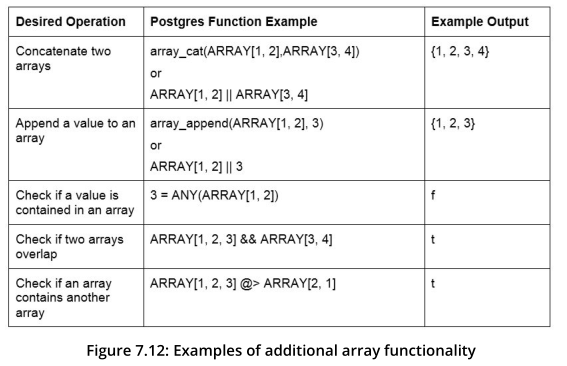

In [24]:
from IPython.display import Image
Image('images/functionality_array.PNG')

## Usando tipos de dados JSON no Postgres
Embora os arrays possam ser úteis para armazenar uma lista de valores em um único campo, às vezes nossas estruturas de dados podem ser complexas. Por exemplo, podemos querer armazenar vários valores de diferentes tipos em um único campo e podemos querer que os dados sejam codificados com rótulos em vez de armazenados sequencialmente. Esses são problemas comuns com dados em nível de log, bem como dados alternativos.

**JavaScript Object Notation (JSON)** é um formato de texto padrão aberto para armazenar dados de complexidade variável. Pode ser usado para representar qualquer coisa. Semelhante a como uma tabela de banco de dados tem nomes de coluna, os dados JSON têm chaves. Podemos representar um registro do banco de dados de nossos **customers** facilmente usando JSON, armazenando nomes de colunas como chaves e valores de linhas como valores. A função **row_to_json** transforma linhas em JSON:

In [26]:
sql = """
      SELECT row_to_json(c)
      FROM customers c
      Limit 1;
	  """
pd.read_sql_query(con=conn, sql=sql)

,row_to_json
0,"{'customer_id': 1, 'title': None, 'first_name'..."


Isso é um pouco difícil de ler, mas podemos adicionar o sinalizador **pretty_bool** à função **row_to_json** para gerar uma versão legível:

In [27]:
sql = """
      SELECT row_to_json(c, TRUE)
      FROM customers c
      Limit 1;
	  """
pd.read_sql_query(con=conn, sql=sql)

,row_to_json
0,"{'customer_id': 1, 'title': None, 'first_name'..."


Como você pode ver, uma vez que reformatamos o JSON, ele apresenta uma representação de texto simples e legível de nossa linha. A estrutura JSON contém chaves e valores. Neste exemplo, as chaves são simplesmente os nomes das colunas e os valores vêm dos valores das linhas. Os valores JSON podem ser valores numéricos (inteiros ou flutuantes), valores booleanos (**true** ou **false**), valores de texto (entre aspas duplas) ou **null**.

JSON também pode incluir estruturas de dados aninhadas. Por exemplo, podemos pegar um cenário hipotético em que também queremos incluir produtos comprados na tabela:
`{`
`"customer_id":1,`
`"example_purchased_products":["Lemon", "Bat Limited Edition"]`
`}`

Ou podemos levar este exemplo um passo adiante:

In [28]:

{
    "customer_id": 7,
    "sales": [
        {
            "product_id": 7,
            "sales_amount": 599.99,
            "sales_transaction_date": "2019-04-25T04:00:30"
        },
        {
            "product_id": 1,
            "sales_amount": 399.99,
            "sales_transaction_date": "2011-08-08T08:55:56"
        },
        {
            "product_id": 6,
            "sales_amount": 65500,
            "sales_transaction_date": "2016-09-04T12:43:12"
        }
    ],
}

{'customer_id': 7,
 'sales': [{'product_id': 7,
   'sales_amount': 599.99,
   'sales_transaction_date': '2019-04-25T04:00:30'},
  {'product_id': 1,
   'sales_amount': 399.99,
   'sales_transaction_date': '2011-08-08T08:55:56'},
  {'product_id': 6,
   'sales_amount': 65500,
   'sales_transaction_date': '2016-09-04T12:43:12'}]}

Neste exemplo, temos um objeto JSON com duas chaves: **customer_id** e **sales**. Como você pode ver, a chave de **sales** aponta para uma matriz JSON de valores, mas cada valor é outro objeto JSON que representa a venda. Objetos JSON que existem em um objeto JSON são chamados de JSON aninhado. Nesse caso, representamos todas as transações de vendas de um cliente usando uma matriz aninhada que contém objetos JSON aninhados para cada venda.

Embora o JSON seja um formato universal para armazenar dados, ele é ineficiente, porque tudo é armazenado como uma grande string de texto. Para recuperar um valor associado a uma chave, você precisa primeiro analisar o texto, e isso tem um custo computacional relativamente alto associado a ele. Se você tiver apenas alguns objetos JSON, essa sobrecarga de desempenho pode não ser grande coisa; no entanto, pode se tornar um fardo se, por exemplo, você estiver tentando selecionar o objeto JSON com **"customer_id"**: 7 de milhões de outros objetos JSON em seu banco de dados.

### JSONB: JSON pré-analisado
Embora um campo JSON de texto precise ser analisado sempre que for referenciado, um valor JSONB é pré-analisado e os dados são armazenados em um formato binário decomposto. Isso requer que a entrada inicial seja analisada antecipadamente e o benefício é que há uma melhoria significativa no desempenho ao consultar as chaves ou valores neste campo. Isso ocorre porque as chaves e os valores não precisam ser analisados – eles já foram extraídos e armazenados em um formato binário acessível.
> ##### Observação
> O JSONB difere do JSON de algumas outras maneiras também. Primeiro, você não pode ter mais de uma chave com o mesmo nome. Em segundo lugar, a ordem das chaves não é preservada. Terceiro, detalhes semanticamente insignificantes, como espaços em branco, não são preservados.

### Acessando dados de um campo JSON ou JSONB
As chaves JSON podem ser usadas para acessar o valor associado usando o operador ->. Aqui está um exemplo:

In [3]:
sql = """
      SELECT
        '{
            "a": 1,
            "b": 2,
            "c": 3
            }'::JSON -> 'b' AS data;
	  """
pd.read_sql_query(con=conn, sql=sql)

,data
0,2


Neste exemplo, tínhamos um valor JSON de três chaves e estamos tentando acessar o valor da chave **b**. A saída é uma saída única: **2**. Isso ocorre porque a operação **-> 'b'** obtém o valor da chave b do JSON, **{"a": 1, "b": 2, "c": 3}**.

O Postgres também permite que operações mais complexas acessem JSON aninhado usando o operador **#>**. Tome o seguinte exemplo:

In [4]:
sql = """
      SELECT
            '{
                "a": 1,
                "b": [
                    {"d": 4},
                    {"d": 6},
                    {"d": 4}
            ],
                "c": 3
            }'::JSON #> ARRAY['b', '1', 'd'] AS data;
	  """
pd.read_sql_query(con=conn, sql=sql)

,data
0,6


No lado direito do operador **#>**, um array de texto define o caminho para acessar o valor desejado. Nesse caso, selecionamos o valor **'b'**, que é uma lista de objetos JSON aninhados. Em seguida, selecionamos o elemento na lista denotado por **'1'**, que é o segundo elemento porque os índices do array começam em 0. Finalmente, selecionamos o valor associado à chave 'd' – e a saída é **6**.

Essas funções funcionam com campos JSON ou JSONB (lembre-se de que serão executadas muito mais rapidamente em campos JSONB). JSONB, no entanto, também permite funcionalidades adicionais. Por exemplo, digamos que você queira filtrar linhas com base em um par chave-valor. Você pode usar o operador **@>**, que verifica se o objeto JSONB à esquerda contém o valor da chave à direita. Aqui está um exemplo:

In [5]:
sql = """
      SELECT *
      FROM customer_sales
      WHERE customer_json @> '{"customer_id":20}'::JSONB;
	  """
pd.read_sql_query(con=conn, sql=sql)

,customer_json
0,"{'email': 'ihughillj@nationalgeographic.com', ..."


Com JSONB, também podemos deixar nossa saída bonita usando a função **jsonb_pretty**:

In [6]:
sql = """
      SELECT JSONB_PRETTY(customer_json)
      FROM customer_sales
      WHERE customer_json @> '{"customer_id":20}'::JSONB;
	  """
pd.read_sql_query(con=conn, sql=sql)

,jsonb_pretty
0,"{\n ""email"": ""ihughillj@nationalgeographic...."


Também podemos selecionar apenas as chaves do campo JSONB e desagrupá-las em várias linhas usando a função **JSONB_OBJECT_KEYS**. Usando esta função, também podemos extrair o valor associado a cada chave do campo JSONB original usando o operador **->**. Aqui está um exemplo:

In [7]:
sql = """
      SELECT
        JSONB_OBJECT_KEYS(customer_json) AS keys,
        customer_json -> JSONB_OBJECT_KEYS(customer_json) AS values
	  FROM customer_sales
	  WHERE customer_json @> '{"customer_id":20}'::JSONB;
	  """
pd.read_sql_query(con=conn, sql=sql)

,keys,values
0,email,ihughillj@nationalgeographic.com
1,phone,None
2,sales,[]
3,last_name,Hughill
4,date_added,2012-08-08T00:00:00
5,first_name,Itch
6,customer_id,20


### Criando e modificando dados em um campo JSONB
Você também pode adicionar e remover elementos do JSONB. Por exemplo, para adicionar um novo par de valores-chave, **"c": 2**, você pode fazer o seguinte:

In [9]:
sql = """
      SELECT JSONB_INSERT(
            '{"a":1,
              "b":"foo"}',
             ARRAY['c'],
             '2');
	  """
pd.read_sql_query(con=conn, sql=sql)

,jsonb_insert
0,"{'a': 1, 'b': 'foo', 'c': 2}"


Se você quisesse inserir valores em um objeto JSON aninhado, também poderia fazer isso:

In [11]:
sql = """
      SELECT JSONB_INSERT(
            '{"a":1,
            "b":"foo",
            "c":[1, 2, 3, 4]}',
            ARRAY['c', '1'],
            '10');
	  """
pd.read_sql_query(con=conn, sql=sql)

,jsonb_insert
0,"{'a': 1, 'b': 'foo', 'c': [1, 10, 2, 3, 4]}"


Neste exemplo, **ARRAY['c', '1']** representa o caminho onde o novo valor deve ser inserido. Nesse caso, ele primeiro pega a chave **'c'** e o valor da matriz correspondente e, em seguida, insere o valor **('10')** na posição **'1'**.

Para remover uma chave, você pode simplesmente subtrair a chave que deseja remover. Aqui está um exemplo:

In [13]:
sql = """
      SELECT '{"a": 1, "b": 2}'::JSONB - 'b' AS COLUMN;
	  """
pd.read_sql_query(con=conn, sql=sql)

,column
0,{'a': 1}


Neste caso, temos um objeto JSON com duas chaves: **a** e **b**. Quando subtraímos **b**, ficamos apenas com a chave a e seu valor associado.

## Análise de texto usando Postgres
Além de realizar análises usando estruturas de dados complexas no Postgres, também podemos usar os dados não numéricos disponíveis para nós. Muitas vezes, o texto contém informações valiosas – você pode imaginar um vendedor fazendo anotações sobre clientes em potencial: "Interação muito promissora, o cliente está querendo fazer uma compra amanhã" contém dados valiosos, assim como esta nota: "O cliente não está interessado. mais precisam do produto." Embora este texto possa ser valioso para alguém ler manualmente, também pode ser valioso na análise. Palavras-chave nessas declarações, como "promissor", "comprar", "amanhã", "desinteressado" e "não" podem ser extraídas usando as técnicas certas para tentar identificar os principais clientes em potencial de maneira automatizada. Qualquer bloco de texto pode ter palavras-chave que podem ser extraídas para descobrir tendências, por exemplo, em avaliações de clientes, comunicações por e-mail ou notas de vendas. Em muitas circunstâncias, os dados de texto podem ser os dados mais relevantes disponíveis e precisamos usá-los para criar insights significativos.

Neste módulo, veremos como podemos usar algumas funcionalidades do Postgres para extrair palavras-chave que nos ajudarão a identificar tendências. Também aproveitaremos os recursos de pesquisa de texto no Postgres para permitir uma pesquisa rápida.
### Texto de tokenização
Embora grandes blocos de texto (frases, parágrafos e assim por diante) possam fornecer informações úteis para transmitir a um leitor humano, existem poucas soluções analíticas que podem extrair insights de texto não processado. Em quase todos os casos, é útil analisar o texto em palavras individuais. Muitas vezes, o texto é dividido em tokens componentes, onde cada token é uma sequência de caracteres que são agrupados para formar uma unidade semântica. Normalmente, cada token é simplesmente uma palavra na frase, embora em certos casos (como a palavra "can't"), seu mecanismo de análise pode analisar dois tokens: "can" e "t".
> ##### Observação
> Mesmo as técnicas de ponta de Processamento de Linguagem Natural (NLP) geralmente envolvem tokenização antes que o texto possa ser processado. A PNL pode ser útil para executar análises que requerem uma compreensão mais profunda do texto.

Palavras e tokens são úteis porque podem ser combinados em documentos em seus dados. Isso permite que você tire conclusões de alto nível no nível agregado. Por exemplo, se tivermos um conjunto de dados contendo notas de vendas e analisarmos o token "interessado", podemos supor que as notas de vendas contendo "interessado" estejam associadas a clientes com maior probabilidade de fazer uma compra.

O Postgres tem uma funcionalidade que facilita bastante a tokenização. Podemos começar usando a função **STRING_TO_ARRAY**, que divide uma string em um array usando um delimitador, por exemplo, um espaço:
SELECT STRING_TO_ARRAY('Danny e Matt são amigos.', ' ');

In [14]:
sql = """
      SELECT STRING_TO_ARRAY('Danny and Matt are friends.', ' ');
	  """
pd.read_sql_query(con=conn, sql=sql)

,string_to_array
0,"[Danny, and, Matt, are, friends.]"


Neste exemplo, a frase **Danny and Matt are friends.** é dividido no caractere de espaço.

Neste exemplo, temos pontuação, que pode ser melhor removida. Podemos fazer isso facilmente usando a função **REGEXP_REPLACE**. Esta função aceita quatro argumentos: o texto que você deseja modificar, o padrão de texto que deseja substituir, o texto que deve substituí-lo e quaisquer sinalizadores adicionais (mais comumente, você adicionará o sinalizador **'g'**, especificando que a substituição deve acontecer globalmente, ou quantas vezes o padrão for encontrado). Podemos remover o ponto usando um padrão que corresponda à pontuação definida na string **\!@#$%^&*()-=_+,.<>/?|[]** e substitui-lo por espaço:


In [15]:
sql = """
      SELECT REGEXP_REPLACE('Danny and Matt are friends.', '[!,.?-]', ' ', 'g');
	  """
pd.read_sql_query(con=conn, sql=sql)

,regexp_replace
0,Danny and Matt are friends


A pontuação foi removida.

O Postgres também inclui a funcionalidade de lematização (**Steamming**), que é útil para identificar a raiz do token. Por exemplo, os tokens "quick" e "quickly" ou "run" e "running" não são tão diferentes em termos de significado e contêm o mesmo radical. A função **ts_lexize** pode nos ajudar a padronizar nosso texto retornando o radical da palavra, por exemplo:



In [16]:
sql = """
      SELECT TS_LEXIZE('english_stem', 'running');
	  """
pd.read_sql_query(con=conn, sql=sql)

,ts_lexize
0,[run]


Podemos usar essas técnicas para identificar tokens no texto, como veremos no exercício a seguir.

### Exercício 25: Executando Análise de Texto
Neste exercício, queremos identificar quantitativamente palavras-chave que correspondem a classificações acima da média ou abaixo da média usando análise de texto. Em nosso banco de dados ZoomZoom, temos acesso a alguns comentários de pesquisas de clientes, juntamente com classificações sobre a probabilidade de o cliente indicar seus amigos ao ZoomZoom. Essas palavras-chave nos permitirão identificar os principais pontos fortes e fracos a serem considerados pela equipe executiva no futuro.
Siga estas etapas para concluir o exercício:
1. Vamos começar vendo quais dados temos:

In [17]:
sql = """
      SELECT *
      FROM customer_survey
      LIMIT 5;
	  """
pd.read_sql_query(con=conn, sql=sql)

,rating,feedback
0,9,I highly recommend the lemon scooter. It's so ...
1,10,I really enjoyed the sale - I was able to get ...
2,4,"Overall, the experience was ok. I don't think ..."
3,9,The model epsilon has been a fantastic ride - ...
4,9,I've been riding the scooter around town. It's...


Podemos ver que temos acesso a uma classificação numérica entre 1 e 10, e feedback em formato de texto.
2. Para analisar o texto, precisamos analisá-lo em palavras individuais e suas classificações associadas. Podemos fazer isso usando algumas transformações de array:

In [18]:
sql = """
      SELECT UNNEST(STRING_TO_ARRAY(feedback, ' ')) AS word, rating
      FROM customer_survey
      LIMIT 10;
	  """
pd.read_sql_query(con=conn, sql=sql)

,word,rating
0,I,9
1,highly,9
2,recommend,9
3,the,9
4,lemon,9
5,scooter.,9
6,It's,9
7,so,9
8,fast,9
9,I,10
